Exploratory data analysis:
- graphs
- categorical model vs Random effects on zip
- yearbuilt -> age 
- outlier detection -> high leverage points
- pca
- for each individual zip, run value ~ sqft + age. compare betas across zip 

Additional predictors to consider:
- demographics
- macroeconomic indicators (model general economic growth and also recessions/housing bubbles.)
- income by zip code
- unemployment by zip code
- population
- schools/high school graduation.

Baseline modeling strategy:
- linear reg
- cross validation
- model selection
- lasso
- gams/splines on different variables -> eg how to model the time variable. 
- interaction terms

To explore: 
- decision trees -> different processes for different types of houses. this could happen by zip code. 
- random forests
- random note: zip codes change over time. could mean time trend is more predictive in general. 

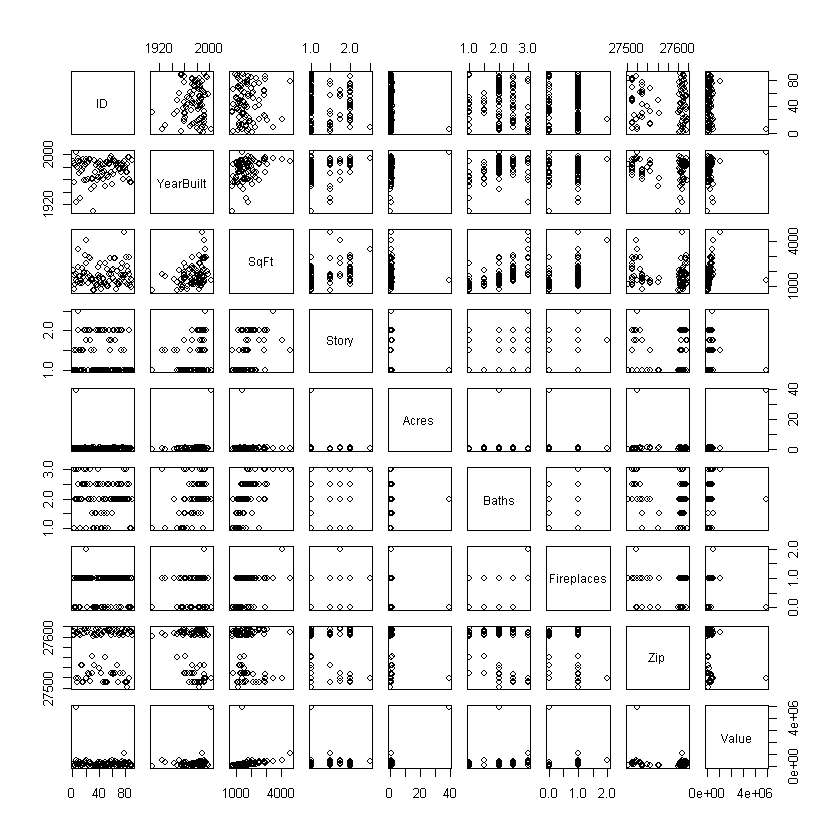

In [47]:
train <- read.csv(file="train.csv",header=TRUE,sep=",")
pairs(train)

In [48]:
# high value homes
newdata <- train[order(Value),]
tail(newdata)

,ID,YearBuilt,SqFt,Story,Acres,Baths,Fireplaces,Zip,Value
9,9,1994,3483,2.50,0.36,3.0,1,27519,432516
21,21,1992,4071,1.75,0.32,3.0,2,27518,483528
6,6,1924,1829,1.50,0.25,3.0,1,27607,496425
60,60,1952,2044,1.00,0.42,1.5,1,27608,523366
78,78,1989,4650,1.50,0.49,3.0,1,27608,1113750
5,5,2003,1404,1.00,39.38,2.0,0,27519,4904102


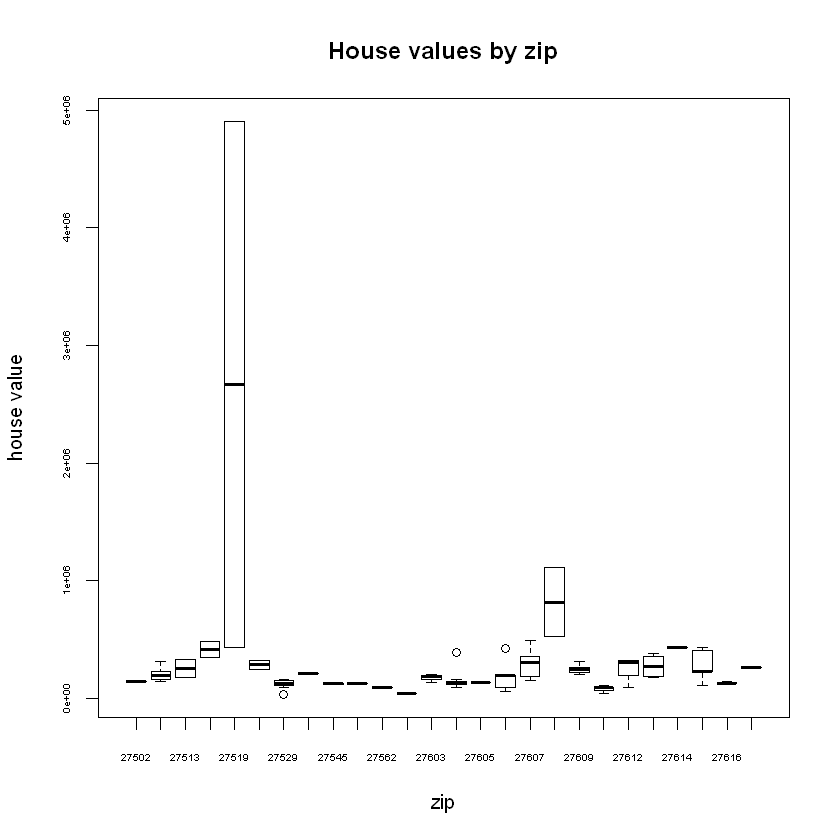

In [49]:
boxplot(Value~Zip,data=train, main="House values by zip", xlab="zip", ylab="house value", cex.axis=.5)

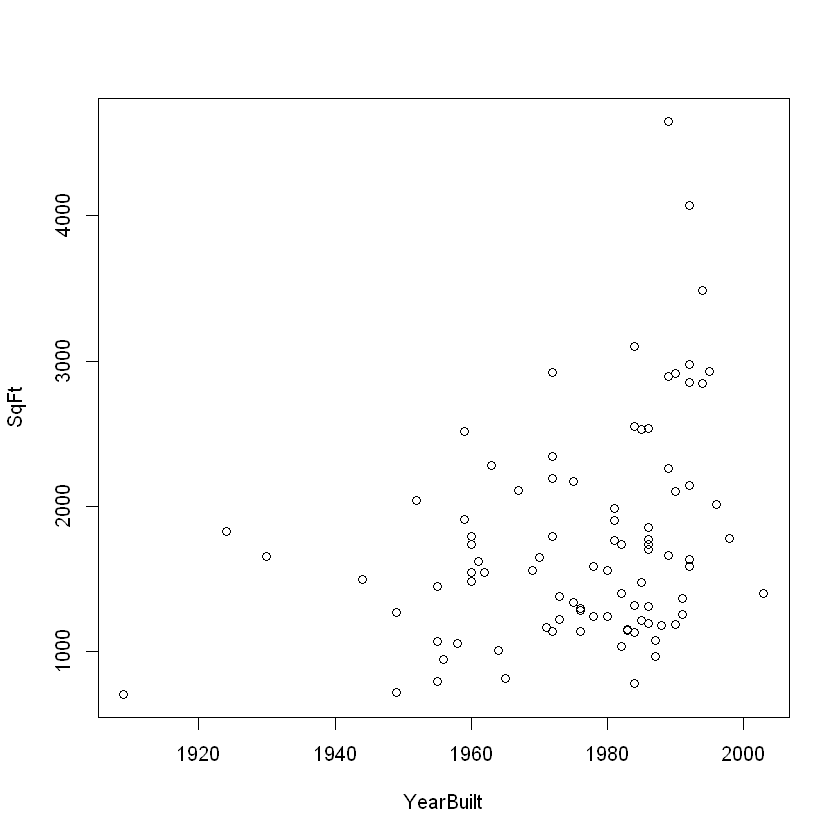

In [65]:
plot(YearBuilt, SqFt)

In [50]:
summary(ols <- lm(log(Value) ~ SqFt + Story + Acres + Baths + Fireplaces + as.factor(Zip), data = train))


Call:
lm(formula = Value ~ SqFt + Story + Acres + Baths + Fireplaces, 
    data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-197641  -42328   -4625   33331  438653 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -90740.84   41109.77  -2.207   0.0301 *  
SqFt           155.48      19.22   8.089 4.32e-12 ***
Story        -9463.48   28208.62  -0.335   0.7381    
Acres       121040.82    2545.72  47.547  < 2e-16 ***
Baths        -4766.84   23815.79  -0.200   0.8418    
Fireplaces   12029.45   26646.47   0.451   0.6528    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 96640 on 83 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9673,	Adjusted R-squared:  0.9653 
F-statistic: 490.8 on 5 and 83 DF,  p-value: < 2.2e-16


Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

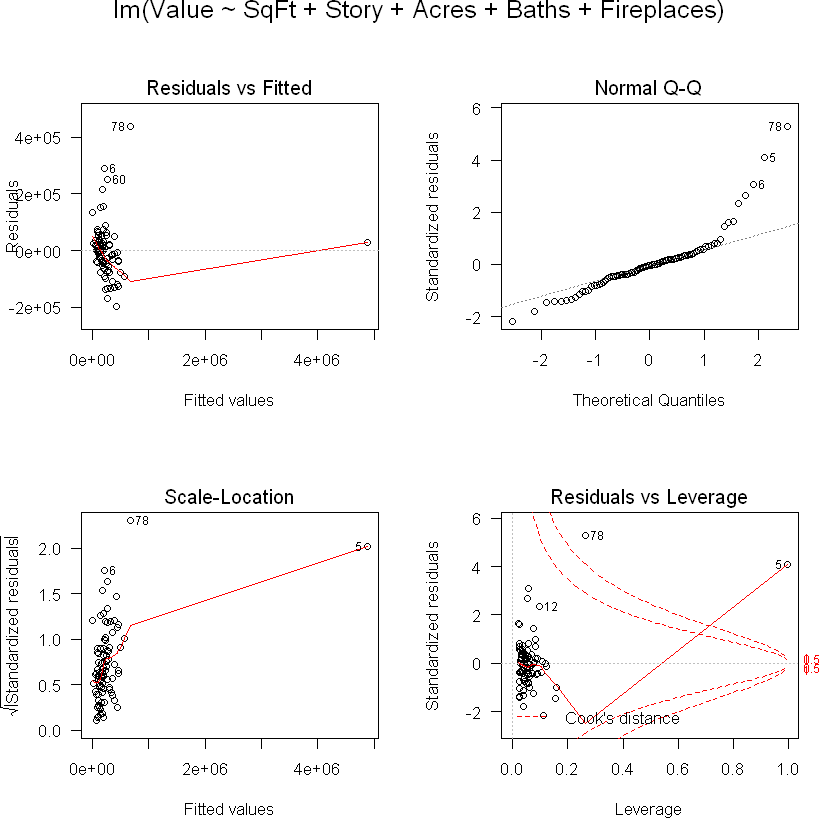

In [51]:
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(ols, las = 1)

In [52]:
train <- train[-c(5,78), ]

Warning message:
"not plotting observations with leverage one:
  7, 18, 28, 29, 31, 38, 48, 58, 73, 79"Warning message:
"not plotting observations with leverage one:
  7, 18, 28, 29, 31, 38, 48, 58, 73, 79"

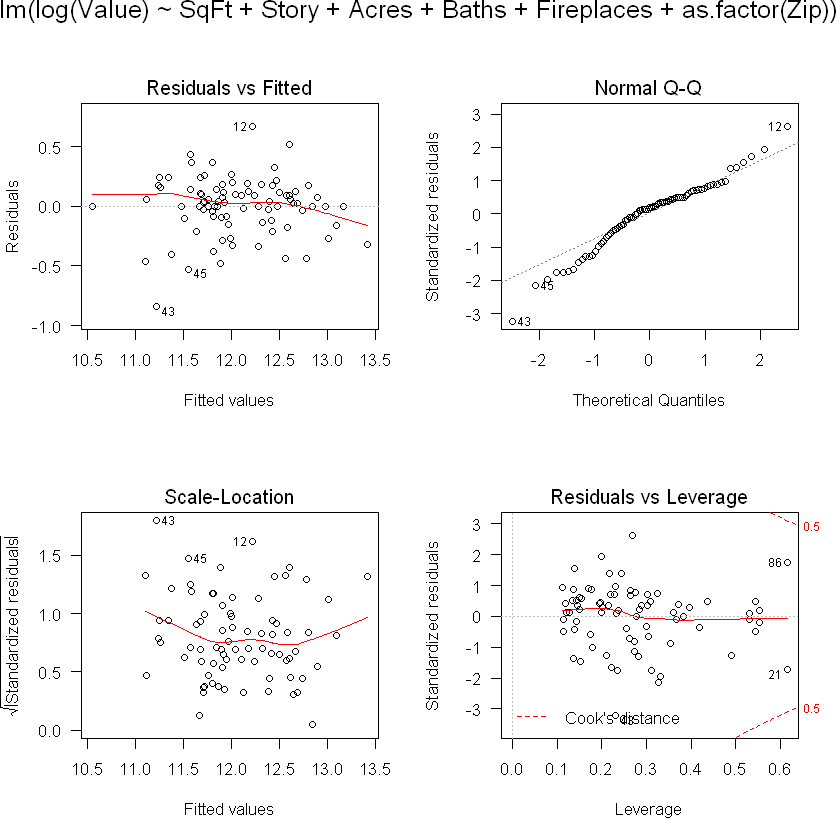

In [59]:
ols <- lm(log(Value) ~ SqFt + Story + Acres + Baths + Fireplaces + as.factor(Zip), data = train)
opar <- par(mfrow = c(2,2), oma = c(0, 0, 1.1, 0))
plot(ols, las = 1)

In [58]:
summary(ols)


Call:
lm(formula = log(Value) ~ SqFt + Story + Acres + Baths + Fireplaces, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93891 -0.18145 -0.00283  0.19967  0.86950 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.077e+01  1.617e-01  66.568  < 2e-16 ***
SqFt        5.383e-04  8.589e-05   6.267 1.68e-08 ***
Story       7.402e-02  1.105e-01   0.670  0.50493    
Acres       4.436e-02  1.271e-01   0.349  0.72794    
Baths       2.196e-02  9.010e-02   0.244  0.80810    
Fireplaces  3.076e-01  1.020e-01   3.016  0.00342 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3621 on 81 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.6479,	Adjusted R-squared:  0.6262 
F-statistic: 29.81 on 5 and 81 DF,  p-value: < 2.2e-16


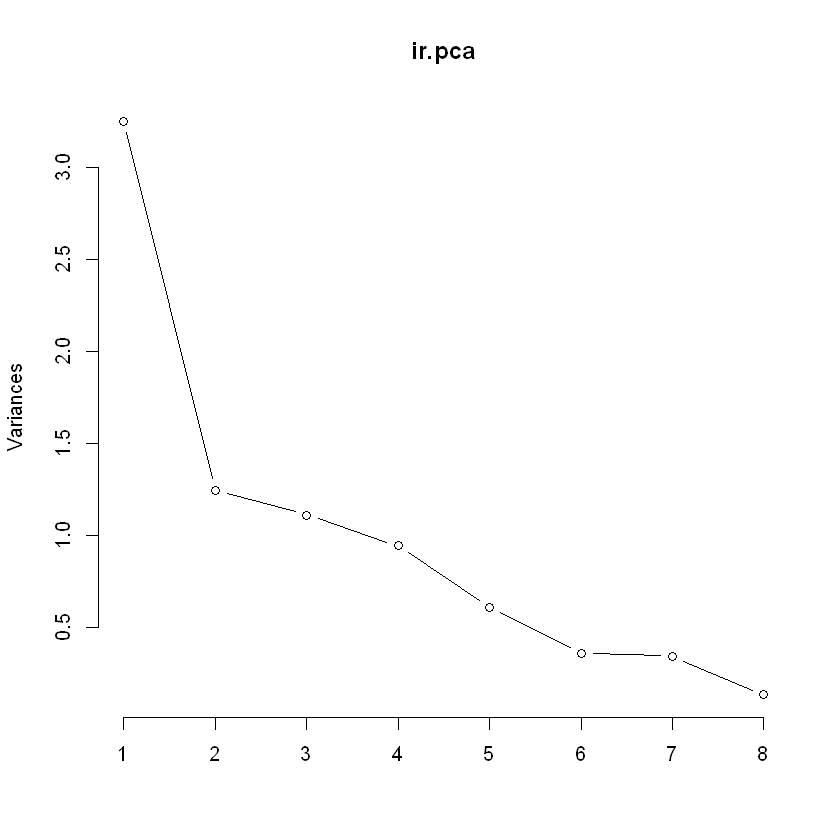

In [60]:
# log transform 
log.training <- log(train[, 3:9])
# apply PCA - scale. = TRUE is highly 
# advisable, but default is FALSE. 
ir.pca <- prcomp(na.omit(train[, 2:9]),
                 center = TRUE,
                 scale. = TRUE)
plot(ir.pca, type = "l")

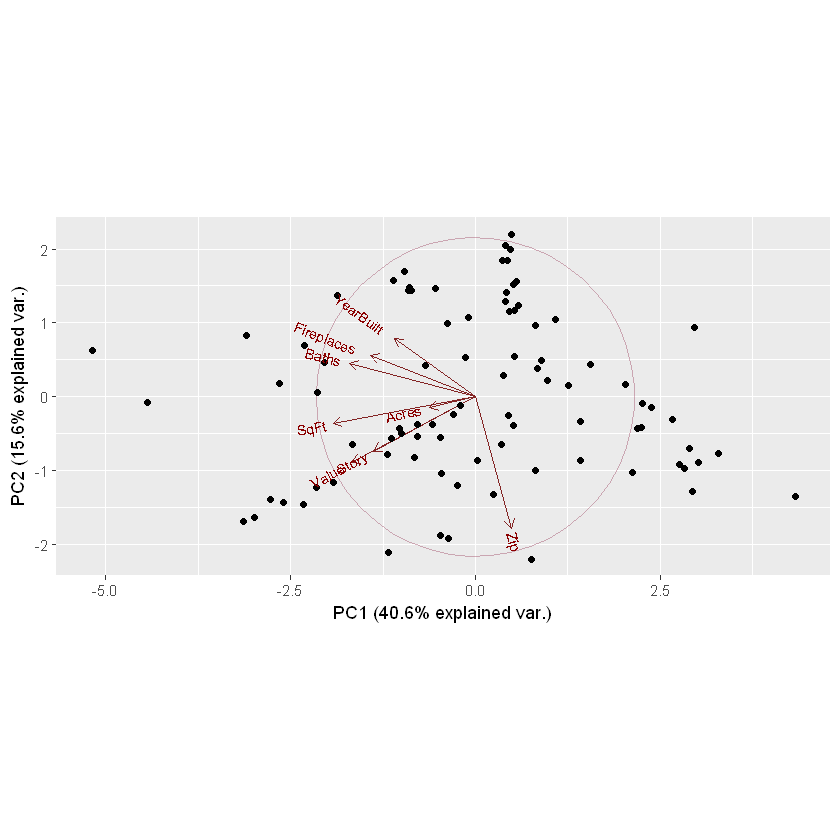

In [61]:
library(ggbiplot)
g <- ggbiplot(ir.pca, obs.scale = 1, var.scale = 1, 
              ellipse = TRUE, 
              circle = TRUE)
g <- g + scale_color_discrete(name = '')
g <- g + theme(legend.direction = 'horizontal', 
               legend.position = 'top')
print(g)